In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report


In [ ]:
data=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
type(data[0][1])

numpy.ndarray

In [ ]:
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
(X_train, y_train), (X_test , y_test) = data

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
# sparse categorical cross entropy and categorical cross entropy
# relu

In [ ]:
y_train=y_train.reshape((-1,))

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

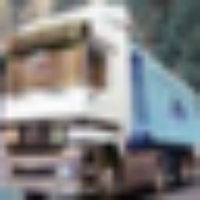

In [ ]:
cv2_imshow(cv2.resize(X_train[1] , (200,200)))

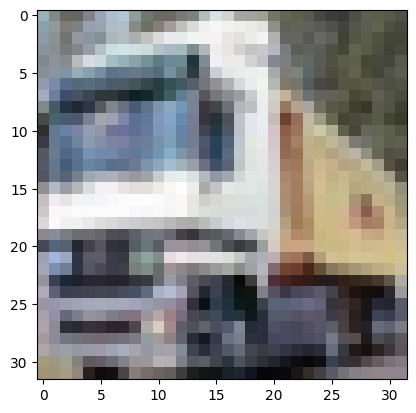

In [ ]:
plt.imshow(X_train[1])

In [ ]:
classes=["airplane",
"automobile",
"bird ",
"cat ",
"deer ",
"dog ",
"frog ",
"horse" ,
"ship ",
"truck"
]

In [ ]:
def display_img (X, y , index):
  plt.figure(figsize=(2,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

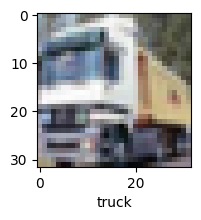

In [ ]:
display_img(X_train,y_train,1)

In [ ]:
X_train=X_train/255     # It is used to scaling
X_test=X_test/255

In [ ]:
cnn_model=keras.Sequential([
    # CNN
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3) ),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3) ) ,
    keras.layers.MaxPooling2D((2,2)),



    # ANN

    keras.layers.Flatten() ,
    keras.layers.Dense(100,activation="softmax"),
    keras.layers.Dense(10,activation="softmax")
    ])


In [ ]:
cnn_model.compile( optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics= "accuracy" )

In [ ]:
cnn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 2.0411 - accuracy: 0.2404
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.7789 - accuracy: 0.3098
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6278 - accuracy: 0.3773
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5050 - accuracy: 0.4151
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4313 - accuracy: 0.4388
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3769 - accuracy: 0.4636
Epoch 7/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3356 - accuracy: 0.4826
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2978 - accuracy: 0.4964
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2606 - accuracy: 0.5155
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [ ]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.2962 - accuracy: 0.5069


[1.2961697578430176, 0.5069000124931335]

In [ ]:
y_pred=cnn_model.predict(X_test)
print(y_pred[0])
y_pred_classes=[np.argmax(i) for i in y_pred]
print(y_pred[0])
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 8ms/step
[0.02388041 0.00858827 0.05617455 0.51312464 0.02733512 0.28613925
 0.02885247 0.03823487 0.01228676 0.00538355]
[0.02388041 0.00858827 0.05617455 0.51312464 0.02733512 0.28613925
 0.02885247 0.03823487 0.01228676 0.00538355]
              precision    recall  f1-score   support

           0       0.44      0.30      0.36      1000
           1       0.54      0.71      0.62      1000
           2       0.40      0.28      0.33      1000
           3       0.41      0.49      0.45      1000
           4       0.44      0.28      0.34      1000
           5       0.44      0.57      0.50      1000
           6       0.57      0.83      0.68      1000
           7       0.65      0.72      0.69      1000
           8       0.51      0.61      0.56      1000
           9       0.61      0.28      0.38      1000

    accuracy                           0.51     10000
   macro avg       0.50      0.51      0.49     10000
weighted avg   

In [ ]:
cnn_model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x798f45a2d330>>